#  <p style = "font-family:Fantasy" letter-spacing = 17rem><Font color = 'lightblue'> iris Dataset </Font></p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier





mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
seed=0
np.random.seed(42)

### **1- Data Preprocessing:**


 Load the Iris dataset.


In [3]:
#load iris dataset from sklearn datasets library
iris_data=datasets.load_iris()
# add the loaded dataset into a dataframe for the data preprocessing task
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['iris type'] = iris_data.target

Perform data exploration.

In [4]:
# to display the first 5 rows in the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# decrible the dataframe 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

 Check for missing values and handle them if any.

In [7]:
# check if there's any null values in the dataframe
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris type            0
dtype: int64

data visualization

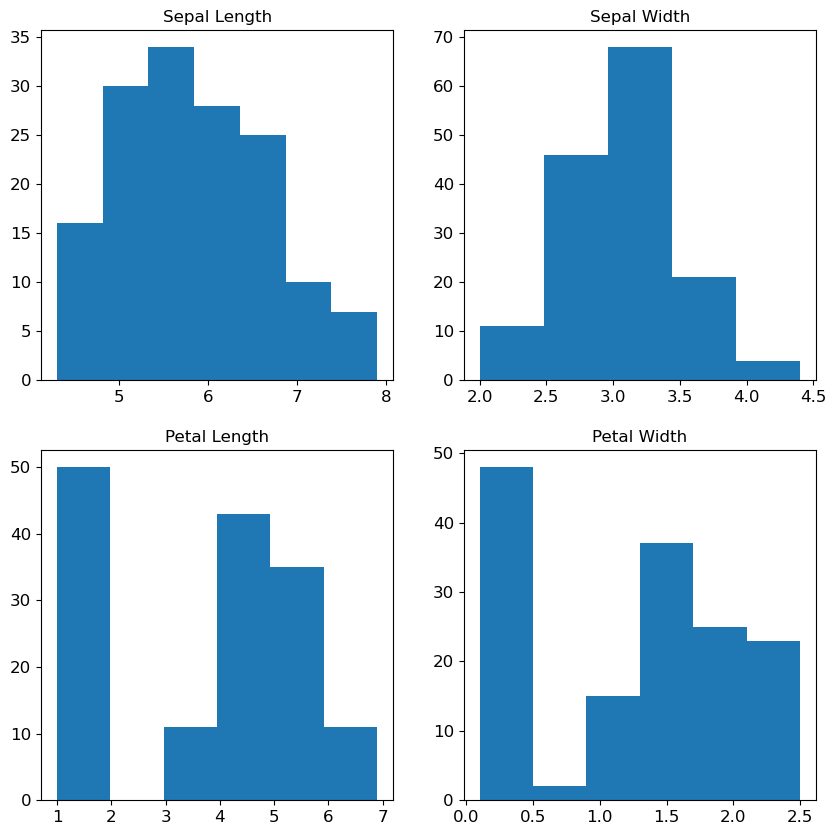

In [8]:
#plot sepal lenght, sepal width, petal lenght, petal width
fig, axes = plt.subplots(2, 2, figsize=(10,10)) 
  
axes[0,0].set_title("Sepal Length") 
axes[0,0].hist(df['sepal length (cm)'], bins=7) 
  
axes[0,1].set_title("Sepal Width") 
axes[0,1].hist(df['sepal width (cm)'], bins=5); 
  
axes[1,0].set_title("Petal Length") 
axes[1,0].hist(df['petal length (cm)'], bins=6); 
  
axes[1,1].set_title("Petal Width") 
axes[1,1].hist(df['petal width (cm)'], bins=6);

c:\Users\wedfa\miniconda3\envs\t5\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wedfa\miniconda3\envs\t5\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wedfa\miniconda3\envs\t5\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wedfa\miniconda3\envs\t5\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

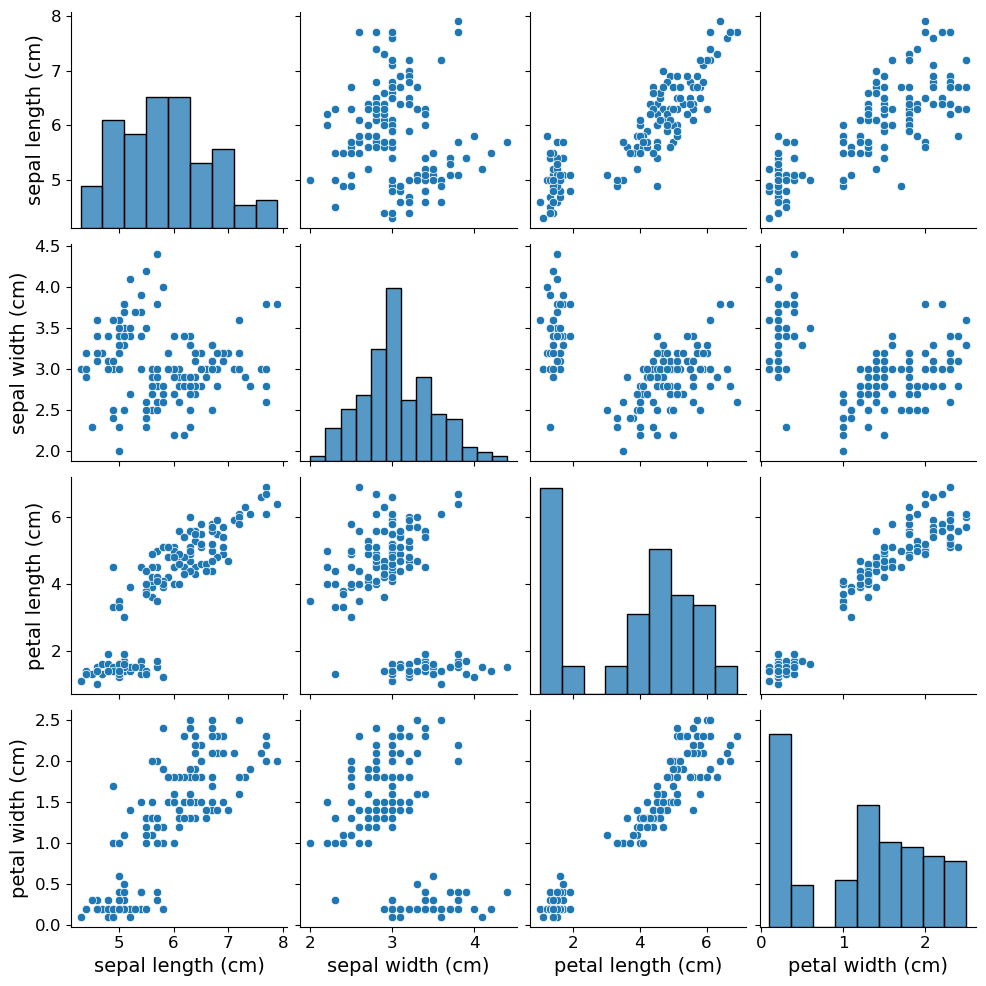

In [9]:
# bivirate plotes this code creates a pair plot to visualize the pairwise relationships between the features.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])
sns.pairplot(df.iloc[:, :-1])  # Exclude target column
plt.show()

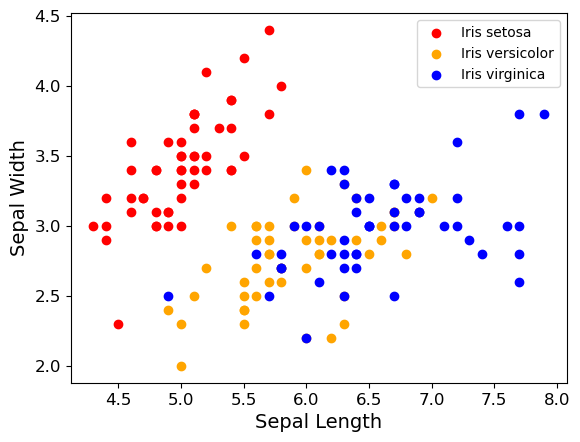

In [10]:
#This code creates a scatter plot where the x-axis represents the sepal length and the y-axis represents the sepal width of different iris flowers.
#The scatter plot differentiates between three species of iris flowers: "Iris setosa," "Iris versicolor," and "Iris virginica." 
#Each species is assigned a specific color ('red,' 'orange,' and 'blue' respectively).
colors = ['red', 'orange', 'blue']
species_id = [0,1,2]
species = ["Iris setosa", "Iris versicolor", "Iris virginica"]
for i in range(3):
    x = df[df['iris type'] == species_id[i]]
    plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

Split the dataset into features and target variables.

In [11]:
#Assigns the features of the Iris dataset to variable x and the target variable to variable y.
x = iris_data.data
y = iris_data.target

iris type
0    50
1    50
2    50
Name: count, dtype: int64


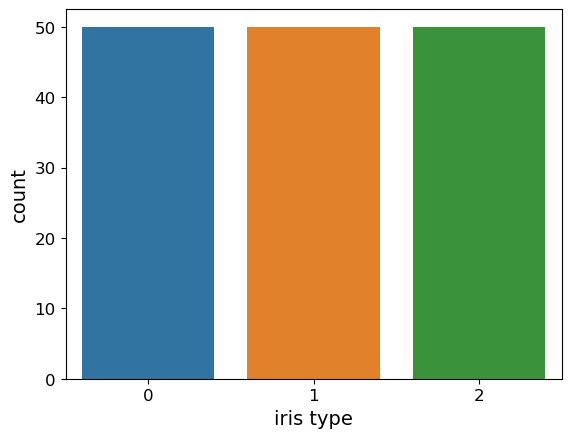

In [12]:
#check in the dataset is imbalanced and plot it
print(df['iris type'].value_counts())
sns.countplot(x='iris type', data=df, ) 
plt.show()

Split the dataset into training and testing sets.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

### **2- Unsupervised Learning: Clustering and Outlier Detection:**


Apply K-means clustering algorithm to cluster the data.

In [14]:
#Fits the K-means clustering algorithm with 3 clusters to the training data (x_train) and predicts the cluster labels for the entire dataset (x),
#assigning the predicted labels to the variable labels.
km = KMeans(n_clusters=3, random_state=seed)
km.fit(x_train)
labels = km.predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Visualize the clusters

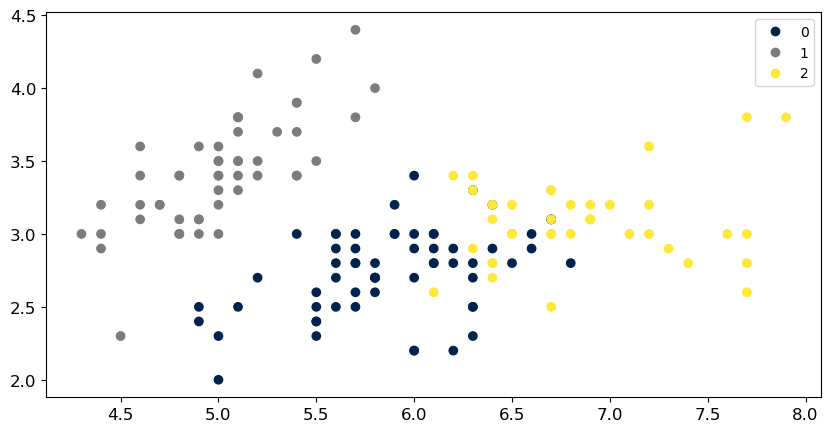

In [15]:
plt.figure(figsize=(10, 5))
# Plot the clusters
scatter = plt.scatter(x=x[:, 0], y=x[:, 1], c=labels, cmap='cividis')
# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(3)))
plt.show()

Detect outliers using appropriate techniques such as isolation forest or DBSCAN

In [16]:
#Detects outliers using the DBSCAN algorithm with an epsilon value of 0.5 and a minimum number of samples of 5, 
#fitting the model to the training data x_train.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x_train)

DBSCAN()

In [17]:
#Creates a set containing the unique cluster labels assigned by the DBSCAN algorithm, accessed through the dbscan.labels_ attribute.
set(dbscan.labels_)

{-1, 0, 1, 2}

Number of outliers detected by DBSCAN: 13


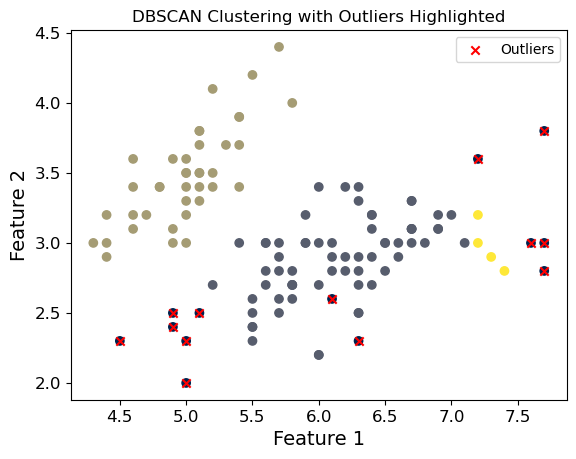

In [18]:
#a scatter plot of the training data (x_train) with colors representing the cluster labels assigned by the DBSCAN algorithm.
#Outliers, identified as points with a cluster label of -1, are plotted separately in red with 'x' markers.
#The title, axis labels, and legend are set accordingly. The number of outliers detected by DBSCAN is counted and printed.

scatter = plt.scatter(x=x_train[:, 0], y=x_train[:, 1], c=dbscan.labels_[:len(x_train)], cmap='cividis')

# Selecting outliers
outliers = x_train[dbscan.labels_ == -1]
# Plotting outliers separately
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')

plt.title('DBSCAN Clustering with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Counting outliers
num_outliers_dbscan = len(outliers)
print("Number of outliers detected by DBSCAN:", num_outliers_dbscan)

plt.show()

Evaluate the clustering results

In [19]:
#Calculates and prints the Silhouette Coefficient for the clustering results obtained from the DBSCAN algorithm using the feature data x
#and cluster labels labels.
# Calculate Silhouette Coefficient
silhouette_coeff = silhouette_score(x,labels)

# Print Silhouette Coefficient
print("Silhouette Coefficient:", silhouette_coeff)


Silhouette Coefficient: 0.5511916046195919


### **3- Supervised Learning: Baseline Model:**


Choose an appropriate evaluation metric based on the problem = Accuracy

 Build a baseline model (e.g., logistic regression or decision tree) using default parameters.

In [20]:
#Creates a logistic regression model, trains it using the training data x_train and labels y_train 
#and predicts the labels for the test data x_test, assigning the predicted labels to y_pred.
lr_model = LogisticRegression()
# model training
lr_model.fit(x_train, y_train)
y_pred=lr_model.predict(x_test)


 Evaluate the baseline model's performance

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(57.222222222222214, 0.5, 'Truth')

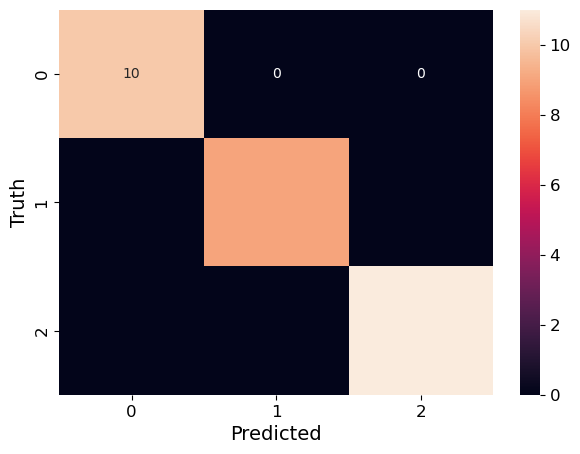

In [21]:
# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred)
accuracy

# Calculate accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

### **4- Model Comparison:**


In [22]:
#Create a support vector machine (SVM) model, fits it to the training data x_train and labels y_train,
#predicts the labels for the test data x_test, and calculates the average accuracy using 5-fold cross-validation, printing the result.
svm_classifier = SVC()

# training
svm_classifier.fit(x_train,y_train)

# prediction
ypred_svm = svm_classifier.predict(x_test)


accuracy = cross_val_score(svm_classifier, x_train,y_train, cv=5,scoring="accuracy").mean()
print("Accuracy:", accuracy)

Accuracy: 0.95


In [23]:
# random forest
# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Training
rf_classifier.fit(x_train, y_train)

# Prediction
ypred_rf = rf_classifier.predict(x_test)

# Evaluate accuracy using cross-validation
accuracy = cross_val_score(rf_classifier, x_train, y_train, cv=5, scoring="accuracy").mean()
print("Accuracy:", accuracy)

Accuracy: 0.95


In [24]:
# xgboost

xgboo = XGBClassifier()
# Training
xgboo.fit(x_train, y_train)

# Prediction
ypred_rf = xgboo.predict(x_test)

# Evaluate accuracy using cross-validation
accuracy = cross_val_score(xgboo, x_train, y_train, cv=5, scoring="accuracy").mean()
print("Accuracy:", accuracy)


Accuracy: 0.9333333333333333


### **5- Model Tuning and Ensemble**


Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search

In [25]:
#Performs a grid search using cross-validation to find the optimal hyperparameter value for the parameter C
#in the support vector machine (SVM) model. The hyperparameter grid is defined with the values [0.1, 1.0, 10.0] for C.
#The grid search is fitted to the training data x_train and labels y_train in a single line of code.
param_grid = {'C': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1.0, 10.0]})

 Evaluate the tuned model's performance

In [26]:
#Obtains the best estimator from the grid search (grid_search.best_estimator_) and assigns it to the variable tuned_model.
tuned_model = grid_search.best_estimator_
#Predicts the labels for the test data x_test using the tuned model and assigns them to y_pred_tuned.
y_pred_tuned = tuned_model.predict(x_test)
#Calculates the accuracy of the tuned model by comparing its predicted labels (y_pred_tuned) with the true labels (y_test) 
#using the accuracy_score function, and stores the result in accuracy_tuned.
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
#Prints the accuracy of the tuned model (accuracy_tuned) and displays the classification report using the classification_report function
#which compares the predicted labels (y_pred_tuned) with the true labels (y_test).
print("Tuned Model Accuracy:", accuracy_tuned)
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

Tuned Model Accuracy: 1.0
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model

In [27]:
estimators = [
    ('SVM', svm_classifier),
    ('Random Forest', rf_classifier),
    ('XGBoost', xgboo)
]
# Create the ensemble model
ensemble_model = VotingClassifier(estimators=estimators)

# Fit the ensemble model on the training data
ensemble_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_ensemble = ensemble_model.predict(x_test)

# Calculate the accuracy of the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print("Ensemble Model Accuracy:", accuracy_ensemble)
print("Classification Report (Ensemble Model):")
print(classification_report(y_test, y_pred_ensemble))

Ensemble Model Accuracy: 1.0
Classification Report (Ensemble Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

